# Ejercicio a entregar
En este ejercicio se debe realizar un recomendador basado en contenidos para las imágenes que se encuentran en la carpeta 'imagenes_recomendador' dentro de 'datasets'. El recomendador consitirá en obtener las cinco imágenes más similares para una determianda imagen. 

Para obtener esta recomendación los pasos a dar son:
1. Cargar el *path* de todas las imagenes que se encuentran en la carpeta
2. Para cada imagen obtener sus features, para ello usaremos el modelo de CNN *[ResNet](https://keras.io/applications/#resnet)*
3. Para una determianda imagen, obtener las cinco imagenes mas cercanas


## Ampliación voluntaria
Aplicando técnicas de clustering, segmentar los distitos productos del conjunto de imágenes. Obteniendose el número de grupos en los que se dividen, asi como dos imagenes de representantes de cada grupo.

Para mejorar la eficiencia del sistema de recomendación, dada una imagen para recomendar, obtener la recomendación a partir de:
1. Los cinco elementos más similares al elemento dentro de su grupo
2. Los cinco elementos centrales de su grupo

# Parte obligatoria
## PASO 1: Cargar el *path* de todas las imágenes que se encuentran en la carpeta
En este paso se debe cargar en la variable `lstImagenes` la ruta a todas las imágenes. Puedes usar la función `obtenerPathJpg`. Esta función recibe como parámetro la ruta de una carpeta y devuele una lista con todos los fichero .jpg que se encuentran es su interior.

In [1]:
import os

def obtenerPathJpg(dir):
    lstFicheros=[]
    for file in os.listdir(path):
        if file.endswith(".jpg"):
            lstFicheros.append(os.path.join(path, file))
    return lstFicheros

#Obtner imágenes
#lstImagenes = ...

### Validación de los datos cargados
Tras realizar la carga de los *path* en la variable `lstImagenes`, podemos validar a continuación los resultados. Si no se muestran de manera correcta el *path* del fichero junto con su imagen, esto nos indica que no se ha realizado de manera correcta la carga de los *path* de las imagenes en la variable `lstImagenes` en el bloque anterior.

../datasets/imagenes_recomendador/823.jpg


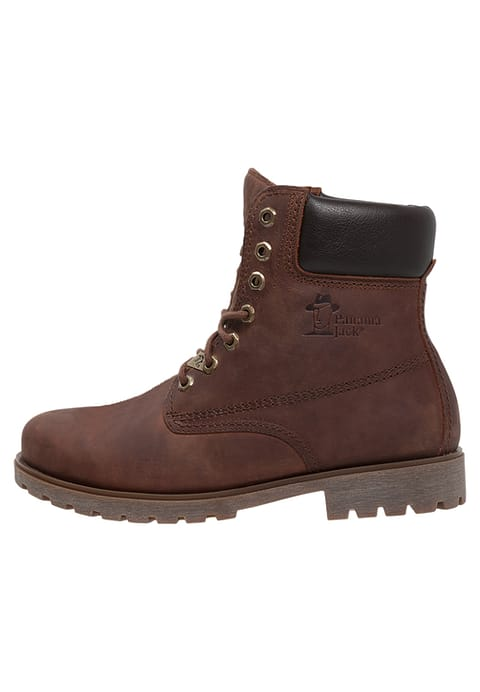

../datasets/imagenes_recomendador/6405.jpg


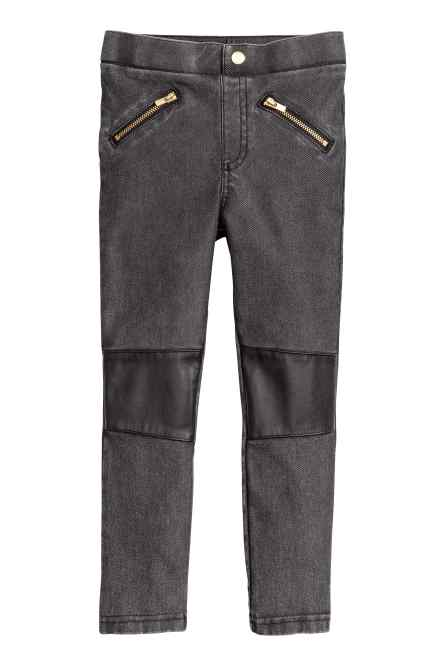

In [2]:
from IPython.display import Image, display


print lstImagenes[0]
display(Image(filename = lstImagenes[0], width=100, height=100))
print lstImagenes[30]
display(Image(filename = lstImagenes[30], width=100, height=100))

## PASO 2: Para cada imagen obtener sus *features*, para ello usaremos el modelo de CNN ResNet
En primer lugar, en este paso en necesario cargar el modelo *[ResNet](https://keras.io/applications/#resnet)*, y una vez tenemos cargado el modelo, preprocesar cada una de las imágenes según este para posterirormente obtener las *features* obtenidas por la red. Almacenando en la variable `lstFeature`las *features* de todas las imagenes.

**NOTAS**
1. Para recorrer todas las imagenes puedes usar un bucle `for`, por ejemplo, `for rutaImagen in lstImagenes:`y dentro de este bucle obtenere la feature de cada una de las imagenes y añadirla a la variable lstFeatures
2. Las listas posen un método append, mediante el cual podemso añadir un elemento a esta, por ejemplo, `lstFeatures.append(features)`

In [3]:
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
import numpy as np

lstFeatures = []

#Carga del modelo de ResNet50
#modelo = ...

#Recorrer todas las imágenes y generar la lista de features e




Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


/Users/Mario/anaconda/lib/python2.7/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


A continuación se muestran las features de las 20 primeras imagenes

In [4]:
for i in range(20):
    print lstFeatures[i]

[-0. -0. -0. ... -0. -0. -0.]
[-0. -0. -0. ... -0. -0. -0.]
[-0. -0. -0. ... -0. -0. -0.]
[-0. -0. -0. ... -0. -0. -0.]
[-0. -0. -0. ... -0. -0. -0.]
[-0. -0. -0. ... -0. -0. -0.]
[-0. -0. -0. ... -0. -0. -0.]
[-0. -0. -0. ... -0. -0. -0.]
[-0. -0. -0. ... -0. -0. -0.]
[-0. -0. -0. ... -0. -0. -0.]
[-0. -0. -0. ... -0. -0. -0.]
[-0. -0. -0. ... -0. -0. -0.]
[-0. -0. -0. ... -0. -0. -0.]
[-0. -0. -0. ... -0. -0. -0.]
[-0. -0. -0. ... -0. -0. -0.]
[-0. -0. -0. ... -0. -0. -0.]
[-0. -0. -0. ... -0. -0. -0.]
[-0. -0. -0. ... -0. -0. -0.]
[-0. -0. -0. ... -0. -0. -0.]
[-0. -0. -0. ... -0. -0. -0.]


## PASO 3: Para una determinada imagen, obtener las cinco imágenes más cercanas

Indicando la posición de una determinada imagen de la lista de imagenes `lstImagenes`, se obtiene las cinco imagenes mas similares

**Posición de la imágen a recomendar**

In [5]:
indiceImagenRecomendar = 2

**Búsqueda de las mas cercanas**
Se calcula la similitud con el resto de imágenes y se alamcena las cinco mas cercanas en la variable `recomendaciones`

**NOTAS**
1. Puedes usar la función `similitudCoseno`, esta función devuelve la distancia coseno existente entre dos vectores de features
2. Para obtener de manera mas cómoda las imágenes mas cercanas usaremos un *[heap](https://docs.python.org/2/library/heapq.html)*. Esta estructura de datos nos permite obtener de una manera rápida y eficiente los elementos que un menor valor de similitud. Para añadir un nuevo elemento puede usar una sentencia como `heapq.heappush(heap, (sim, lstImagenes[i]))`, donde `heap` sería la variable donde se van alamcenando de manera ordenada los valores de similitud, `sim` es la distancia coseno que se ha obtenido entre las dos imágenes y como segundo parámetro le pasamos la ruta a la imagen, para posteriormente poder recuperarla.

In [6]:
from sklearn.metrics.pairwise import cosine_similarity
import heapq

def similitudCoseno(F1, F2):
    sim = cosine_similarity(F1.reshape(1, -1), F2.reshape(1, -1))
    return sim

    
i = 0
heap = []

#Recorrer todas las features para obtener las imagen mas similar
#...


#Con la siguiente linea puedes obtener las cinco recomendaciones más cercanas
recomendaciones = heapq.nlargest(5,heap)




Se muestra la imagen indicada para recomendar y las cinco más similares, que se encuentran en la variable `recomendaciones`

Producto


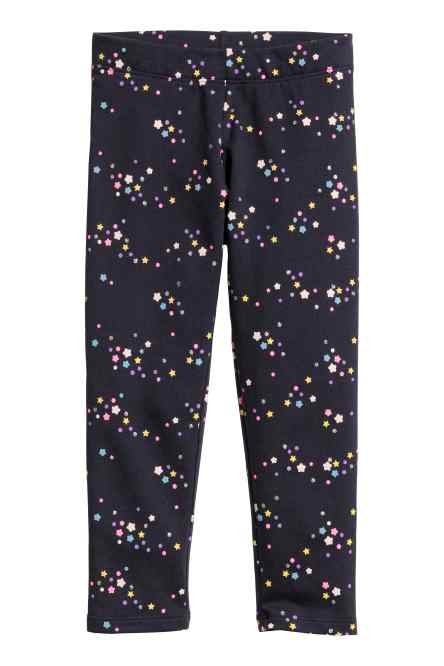

Recomendaciones


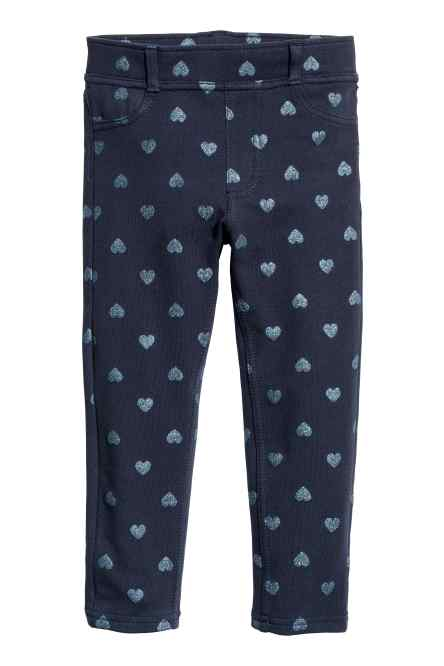

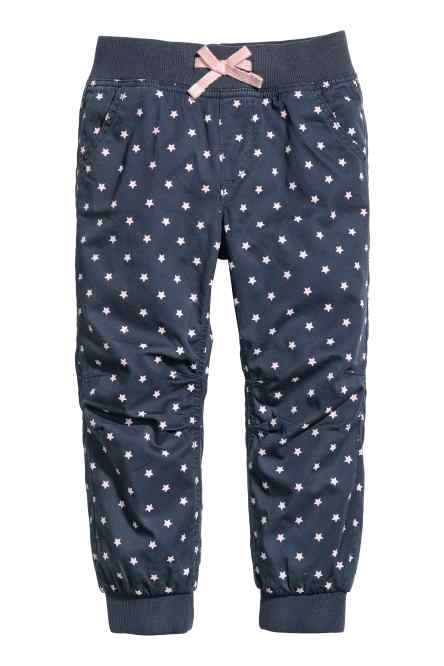

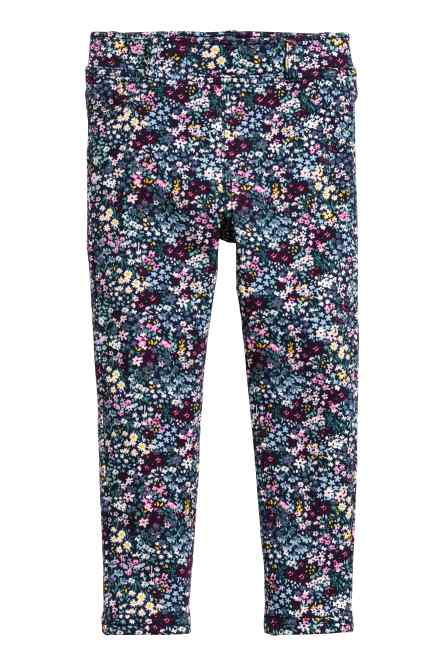

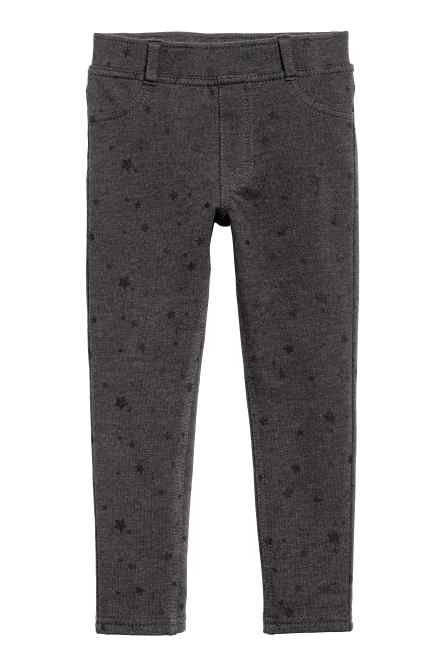

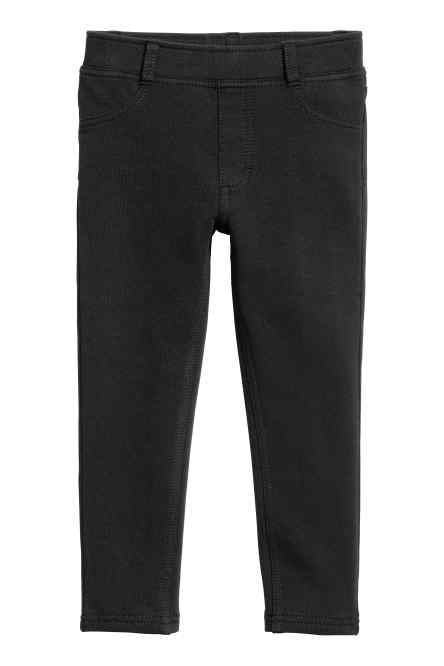

In [7]:
print 'Producto'
display(Image(filename = lstImagenes[indiceImagenRecomendar], width=100, height=100))
print 'Recomendaciones'
for recomendacion in recomendaciones:
    display(Image(filename = recomendacion[1], width=100, height=100))

# Parte voluntaria

## Parte 1 Clustering
Obtener los distintos *cluster* en los que se pueden segmentar los elementos.

Documente sus pasos y añada su código 

## Parte 2 Mejora del recomendador
Para un elemento dado obtener la recomendación a partir de:
1. Los cinco elementos más similares al elemento dentro de su grupo
2. Los cinco elementos centrales de su grupo

Documente sus pasos y añada su código 